# Análisis Exploratorio de Datos: Felicidad Global 2011–2024

Este notebook realiza un análisis exploratorio sobre los factores que influyen en el nivel de felicidad de los países a lo largo del tiempo, utilizando datos del World Happiness Report.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# Ruta de los archivos de datos (dataset)
ruta = "../data/Data+for+Figure+2.1+(2011–2024).xlsx"

# cargar el archivo con pandas
df = pd.read_excel(ruta)

# Mostrar las primeras filas del dataframe para verificar que se ha cargado correctamente
print(df.head())

   Year  Rank Country name  Ladder score  upperwhisker  lowerwhisker  \
0  2024     1      Finland         7.736         7.810         7.662   
1  2023   143  Afghanistan         1.721         1.775         1.667   
2  2022   137  Afghanistan         1.859         1.923         1.795   
3  2021   146  Afghanistan         2.404         2.469         2.339   
4  2020   150  Afghanistan         2.523         2.596         2.449   

   Explained by: Log GDP per capita  Explained by: Social support  \
0                             1.749                         1.783   
1                             0.628                         0.000   
2                             0.645                         0.000   
3                             0.758                         0.000   
4                             0.370                         0.000   

   Explained by: Healthy life expectancy  \
0                                  0.824   
1                                  0.242   
2                   

In [7]:
# Ver el tamaño real del dataset

df.shape

(1969, 13)

In [ ]:
# Ver el tamaño real del dataset

df.shape

(1969, 13)

### Ver las columnas con sus nombres y tipos de datos

In [ ]:
df.dtypes

Year                                            int64
Rank                                            int64
Country name                                   object
Ladder score                                  float64
upperwhisker                                  float64
lowerwhisker                                  float64
Explained by: Log GDP per capita              float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia + residual                           float64
dtype: object

### Ver los primeros registros con todas las columnas visibles

In [10]:
with pd.option_context('display.max_columns', None):
    display(df.head(10))

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.7360,7.81000,7.66200,1.749000,1.783000,0.824000,0.986,0.110000,0.502000,1.782000
1,2023,143,Afghanistan,1.7210,1.77500,1.66700,0.628000,0.000000,0.242000,0.000,0.091000,0.088000,0.672000
2,2022,137,Afghanistan,1.8590,1.92300,1.79500,0.645000,0.000000,0.087000,0.000,0.093000,0.059000,0.976000
3,2021,146,Afghanistan,2.4040,2.46900,2.33900,0.758000,0.000000,0.289000,0.000,0.089000,0.005000,1.263000
4,2020,150,Afghanistan,2.5230,2.59600,2.44900,0.370000,0.000000,0.126000,0.000,0.122000,0.010000,1.895000
5,2019,153,Afghanistan,2.5669,2.62827,2.50553,0.300706,0.356434,0.266052,0.000,0.135235,0.001226,1.507236
6,2018,154,Afghanistan,3.2030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017,145,Afghanistan,3.6320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016,141,Afghanistan,3.7940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,154,Afghanistan,3.3600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Vemos cuantos países y años hay en total en el dataframe

In [12]:
print("Total de países:", df['Country name'].nunique())
print("Total de años:", df['Year'].nunique())

Total de países: 169
Total de años: 13


#### Vamos a documentar las columnas con el fin de poder explicar el significado de cada columna

### 🧾 Descripción de las columnas del dataset - World Happiness Report

| Columna                                 | Descripción                                                                 |
|-----------------------------------------|------------------------------------------------------------------------------|
| `Year`                                  | Año en el que se midieron los datos.                                        |
| `Country name`                          | Nombre del país.                                                            |
| `Ladder score`                          | Puntuación general de felicidad (escala 0 a 10).                            |
| `Rank`                                  | Posición del país en el ranking global de felicidad.                        |
| `upperwhisker` / `lowerwhisker`         | Límites superior e inferior del intervalo de confianza del `Ladder score`. |
| `Explained by: Log GDP per capita`      | Parte del score explicada por el ingreso per cápita del país (logarítmico).|
| `Explained by: Social support`          | Parte explicada por el apoyo social (familia, amigos, red de ayuda).       |
| `Explained by: Healthy life expectancy` | Parte explicada por la expectativa de vida saludable.                       |
| `Explained by: Freedom to make life choices` | Parte explicada por la libertad percibida para tomar decisiones.       |
| `Explained by: Generosity`              | Parte explicada por la generosidad (donaciones, altruismo).                |
| `Explained by: Perceptions of corruption` | Parte explicada por la corrupción percibida en gobierno/sociedad.        |
| `Dystopia + residual`                   | Valor residual para completar el `Ladder score` (modelo interno).          |


### ¿Qué estamos analizando?

Cada fila representa un país en un año determinado.  
El objetivo es entender qué factores (PIB, salud, libertad, etc.) están más relacionados con la felicidad de los países según el World Happiness Report.

La columna `Ladder score` es la puntuación total de felicidad, y las columnas que empiezan por `Explained by:` explican cómo se construye ese score.

Antes de seguir con limpieza o visualización, es importante tener claro **qué mide cada variable** y **qué tipo de análisis nos interesa realizar** (por ejemplo: comparaciones por país, evolución temporal, correlaciones entre factores...).


#### Visualización general del dataset con los datos que tenemos completos (antes de la limpieza)

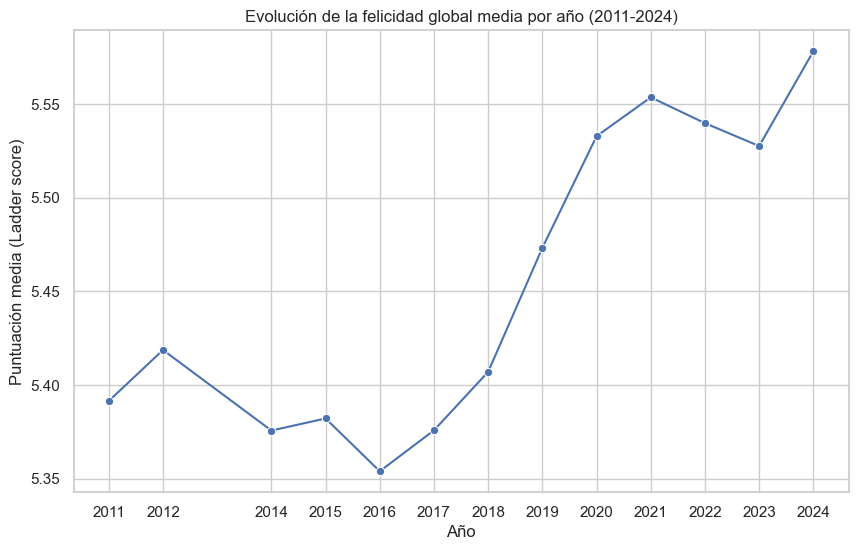

In [23]:
# Calcular la media de felicidad global por año
media_anual = df.groupby('Year')['Ladder score'].mean().reset_index()

# Gráfico de línea: evolución de la felicidad global media
sns.lineplot(data=media_anual, x='Year', y='Ladder score', marker = 'o')
plt.title("Evolución de la felicidad global media por año (2011-2024)")
plt.ylabel("Puntuación media (Ladder score)")
plt.xlabel("Año")
plt.xticks(media_anual['Year'].unique())
plt.grid(True)
plt.show()


In [24]:
# ¿Cuál es el último año con valores completos en Ladder score?
df['Year'].max()


np.int64(2024)

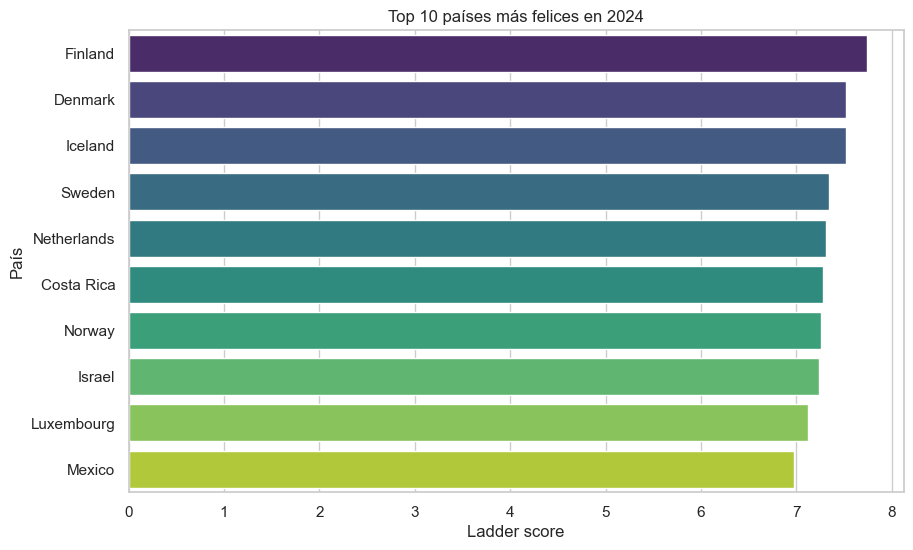

In [27]:
# Filtrar solo el último año disponible
ultimo_anio = df['Year'].max()
df_ultimo_anio = df[df['Year'] == ultimo_anio]

# Mostrar los 10 países más felices
top_10 = df_ultimo_anio.sort_values('Ladder score', ascending=False).head(10)

# Gráfico de barras
sns.barplot(
    data=top_10,
    x='Ladder score',
    y='Country name',
    hue='Country name',
    palette='viridis',
    legend=False
)
plt.title(f"Top 10 países más felices en {ultimo_anio}")
plt.xlabel("Ladder score")
plt.ylabel("País")
plt.show()
